# Introduction to the project

Being a data and artificial intelligence enthusiast, you’ve recently joined Microsoft Azure in an attempt to help organizations understand the benefits of using cloud storage for analytics and applied machine learning in order to help them eventually unleash the power of artificial intelligence. You’re joining at a great time - a new storage offering [Azure Synapse](https://azure.microsoft.com/en-us/services/synapse-analytics/) has been launched that helps customers consolidate their analytics workloads into a single data lake to further generate powerful insights, train their models for multiple AI scenarios (autonomous car, genomics, intelligent surveillance to name a few) and distribute this data to remote locations for local consumption. It’s the next “big thing” and a multi-billion dollar opportunity for your team and your company. Knowing the benefits of the product and having a strong team and ecosystem by your side as a new member of the Microsoft Azure team, you’re eager to let the world know about it and bring its growth to new heights. Your immediate objectives are:

- Review the data about product usage, existing customers’ industries, and verticals as well as geography.
- Identify prospective acquisition funnels and corresponding growth loops.
- Identify opportunities for product improvement.
- Define your high-level game plan and build the proposed acquisition strategy that will map into the overall growth strategy of your product and platform.

Here some further information about [Azure Synapse Analytics (formerly SQL DW) architecture](https://docs.microsoft.com/en-us/azure/synapse-analytics/sql-data-warehouse/massively-parallel-processing-mpp-architecture)

**Our product is a new disruptive technology in the Big Data space.**

- Total revenue to date is approximately $4M.
- Total number of purchases is 700.
- Total number of customers is 200.
- Product has been on the market for 4 months.
- Your average customer lifespan is 20 years.

Check this [video](https://youtu.be/hu1N8uz65Vk)

In [1]:
# import necessary libralies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [2]:
# check names of 
os.listdir()

['.ipynb_checkpoints',
 'Customers.csv',
 'Customers.xlsx',
 'Demand_forecast.csv',
 'growth_azure_synapse.ipynb',
 'Pain_points_and_feedback.csv',
 'peer_feedback_udacity.png',
 'Product_business_review.csv',
 'TM_WORLD_BORDERS-0.3',
 'TM_WORLD_BORDERS_SIMPL-0.3',
 'unleashing_storage_growth.docx',
 'World_Regions.lpk']

### Product usage, existing customers’ industries, and verticals as well as geography
>Information in the customer's table
- Customer name
- Geo region
- Current usage (TB)
- Industry/vertical
- Common requirement
- Internal/External

In [82]:
# import customer data 
customers = pd.read_csv('Customers.csv')

In [ ]:
# rename features for better data elaboration
customers.rename(columns = {'Customer name': 'customer_name', 'Geo region': 'geo_region', 'Current usage (TB)':'current_usage_TB',
       'Industry/vertical':'industry', 'Common requirement': 'common_requirement', 'Internal/External': 'internal_external'}, inplace = True)

### Twelve Month Forecast - Total addressable market in Terabyte
>Typical ramp	
- 0-6 months	70%	Amount of data ingested to storage over the first 2 quarters (6 months)
- 6-9 months	20%	Amount of data ingested to storage in the 3rd quarter
- 9-12 months	10%	Amount of data ingested in the 4th quarter

In [4]:
# import forecast data 
demand = pd.read_csv('Demand_forecast.csv')

In [ ]:
# rename features for better data elaboration
demand.rename(columns = {'Customer name': 'customer_name', 'Geo region': 'geo_region',
 'Total addressable market - 12 mo (TB)': 'total_12mo_mkt_TB', 
 'Unnamed: 3':'u_3','Unnamed: 4':'u_4', 'Unnamed: 5':'u_5', 
 'Unnamed: 6': 'u_6', 'Unnamed: 7': 'u_7' }, inplace = True)

In [7]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_name       209 non-null    object 
 1   geo_region          209 non-null    object 
 2   current_usage_TB    209 non-null    float64
 3   industry            209 non-null    object 
 4   common_requirement  209 non-null    object 
 5   internal_external   209 non-null    object 
dtypes: float64(1), object(5)
memory usage: 9.9+ KB


In [8]:
demand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_name      209 non-null    object 
 1   geo_region         209 non-null    object 
 2   total_12mo_mkt_TB  209 non-null    float64
 3   u_3                0 non-null      float64
 4   u_4                1 non-null      object 
 5   u_5                3 non-null      object 
 6   u_6                3 non-null      object 
 7   u_7                3 non-null      object 
dtypes: float64(2), object(6)
memory usage: 13.2+ KB


In [9]:
# drop columns that is purely informative for the table
demand.drop(['u_3', 'u_4', 'u_5', 'u_6', 'u_7'], axis = 1, inplace = True)

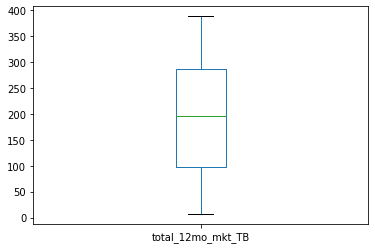

In [10]:
# check rand for demand forecast in Terabytes
demand.total_12mo_mkt_TB.plot(kind = 'box');

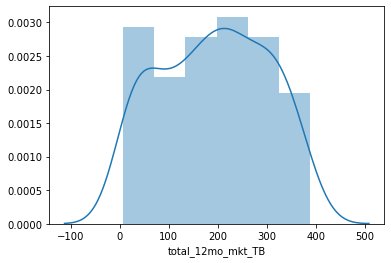

In [11]:
# demsnd customer distribution in a year
sns.distplot(demand.total_12mo_mkt_TB);

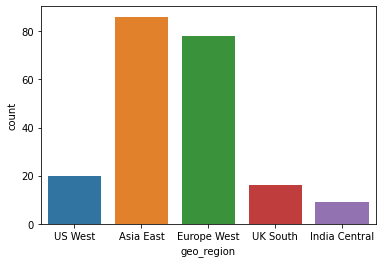

In [12]:
# Geographies presence
sns.countplot(data = customers, x = 'geo_region');

In [13]:
# current usage descriptive statistics 
customers.describe()

,current_usage_TB
count,209.000000
mean,0.956938
std,0.566606
min,0.020607
25%,0.466866
50%,0.911269
75%,1.435944
max,1.931608


In [14]:
# twelve month forecast usage descriptive statistics 
demand.describe()

,total_12mo_mkt_TB
count,209.000000
mean,191.387560
std,109.191364
min,6.789910
25%,97.912583
50%,196.200639
75%,286.706760
max,388.493976


In [15]:
# transform 'industry' variable to categorical 
industries = pd.api.types.CategoricalDtype(ordered = True, categories = list(customers.industry.unique()))
customers['industry'] = customers['industry'].astype(industries)

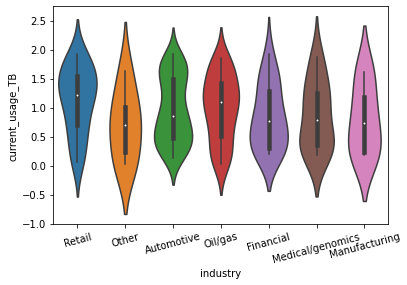

In [16]:
# visualize current usage per industy
sns.violinplot(data = customers, x = 'industry', y = 'current_usage_TB')
plt.xticks(rotation = 15);

In [17]:
# transform 'geo_region' variable to categorical 
geo = pd.api.types.CategoricalDtype(ordered = True, categories = list(customers.geo_region.unique()))
customers['geo_region'] = customers['geo_region'].astype(geo)

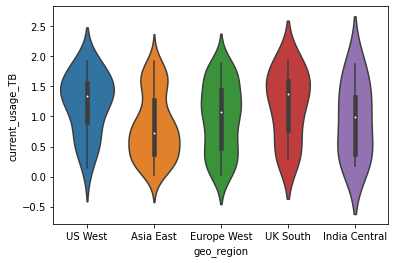

In [18]:
# visualize current usage per geography
sns.violinplot(data = customers, x = 'geo_region', y = 'current_usage_TB');

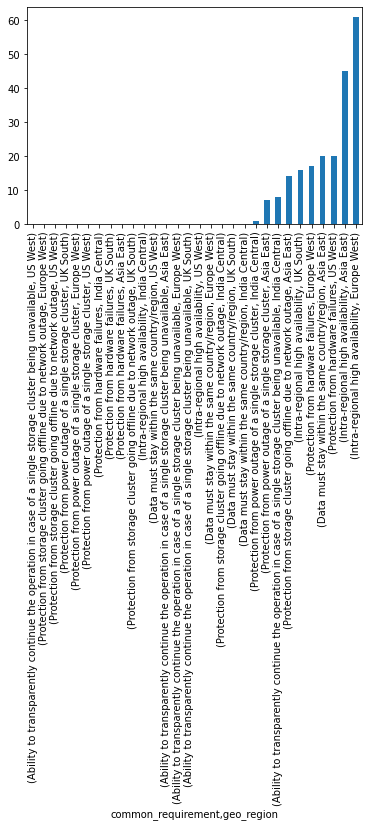

In [19]:
# most important requirement per region
customers.groupby(['common_requirement','geo_region'])['geo_region'].count().sort_values().plot(kind = 'bar');

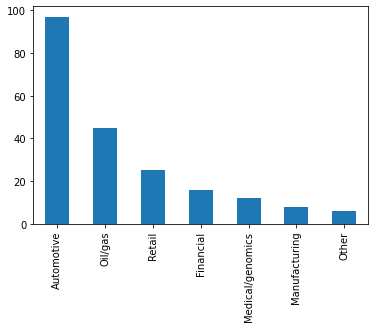

In [20]:
# Industries we cover
customers['industry'].value_counts().plot(kind = 'bar');

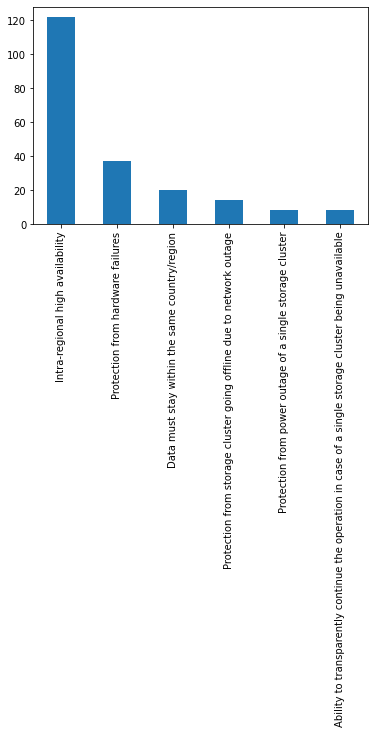

In [21]:
# global requirement 
customers.common_requirement.value_counts().plot(kind = 'bar');

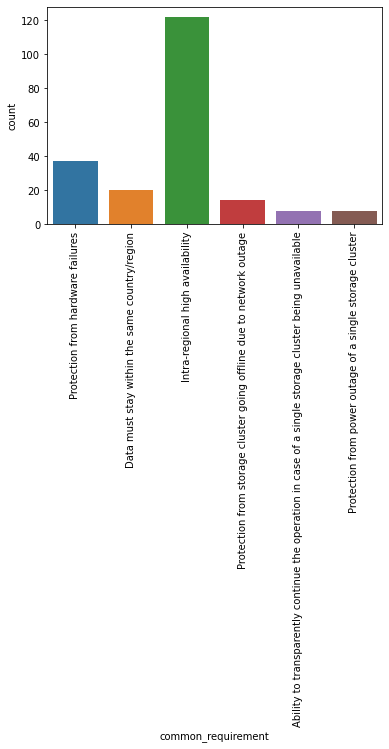

In [22]:
# global common requirement
sns.countplot(customers.common_requirement)
plt.xticks(rotation = 90);

In [23]:
# reset index demand table
demand.set_index('customer_name', inplace = True)

In [24]:
# reset index customers table
customers.set_index('customer_name', inplace = True)

In [25]:
# join customers and demand on index
cus_data = customers.join(demand, lsuffix='_customers', rsuffix='_demand')

### Read feedback table

In [85]:
# read feedback table
feedback = pd.read_csv('Pain_points_and_feedback.csv')

In [86]:
# rename feedback table columns for better data elaboration
feedback.rename(columns = {'Customer name': 'customer_name', 'Common feedback/painpoint 1': 'feed_1', 'Common feedback/painpoint 2': 'feed_2', 'Common feedback/painpoint 3': 'feed_3' }, inplace = True)

In [87]:
# reset feedback table index 
feedback.set_index('customer_name', inplace = True)

In [29]:
# join feedback data
data = cus_data.join(feedback)

In [33]:
# check columns on aggregated data
data.columns

Index(['geo_region_customers', 'current_usage_TB', 'industry',
       'common_requirement', 'internal_external', 'geo_region_demand',
       'total_12mo_mkt_TB', 'feed_1', 'feed_2', 'feed_3'],
      dtype='object')

In [34]:
# geo_region_customers hold the same value, rename one to keep, drop the other
data.rename(columns = {'geo_region_customers': 'geo_region'}, inplace = True)
data.drop('geo_region_demand', axis = 1, inplace = True)

In [72]:
# calculate actual revenue per customer
data['current_revenue'] = data.loc[:, 'current_usage_TB']*15

In [73]:
# calculate prospect revenue in twelve months
data['prospect_revenue'] = data.loc[:, 'total_12mo_mkt_TB']*15

In [74]:
# split data to the ones that have provided feedback and the ones that did not
to_avoid = data[data.feed_1.isnull()]
to_explore = data[data.feed_1.notnull()]

In [76]:
# set seaborn backround to better understand plots
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

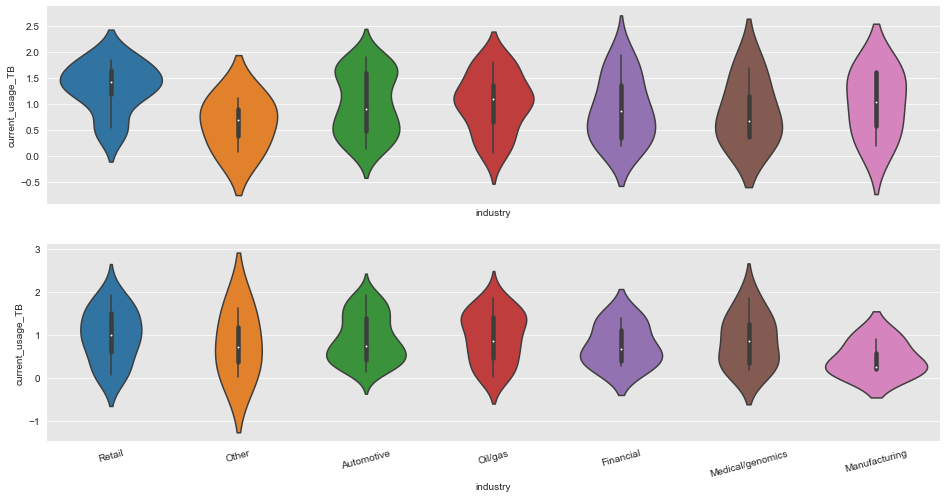

In [104]:
# Set up the matplotlib figure
f, axes = plt.subplots(2, 1, figsize=(16, 8), sharex=True)
sns.despine(left=True)
to_explore.loc[:,'industry'] = to_explore['industry'].astype(industries)
sns.violinplot(data = to_explore, x = 'industry', y = 'current_usage_TB', ax=axes[0])
to_avoid.loc[:,'industry'] = to_avoid['industry'].astype(industries)
sns.violinplot(data = to_avoid, x = 'industry', y = 'current_usage_TB', ax=axes[1])
plt.xticks(rotation = 15);

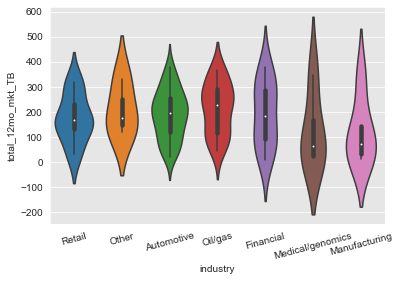

In [47]:
sns.violinplot(data = to_explore, x = 'industry', y = 'total_12mo_mkt_TB')
plt.xticks(rotation = 15);

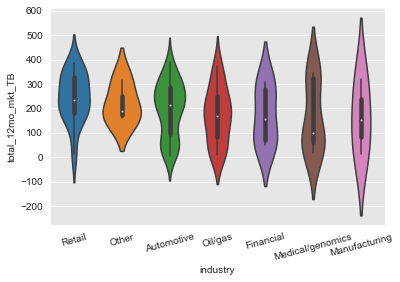

In [48]:
sns.violinplot(data = to_avoid, x = 'industry', y = 'total_12mo_mkt_TB')
plt.xticks(rotation = 15);

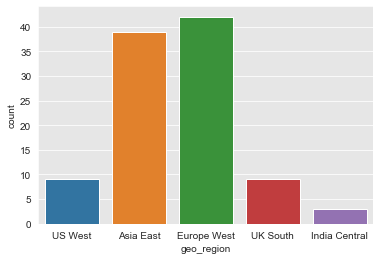

In [49]:
to_explore.loc[:,'geo_region'] = to_explore['geo_region'].astype(geo)
sns.countplot(data = to_explore, x = 'geo_region');

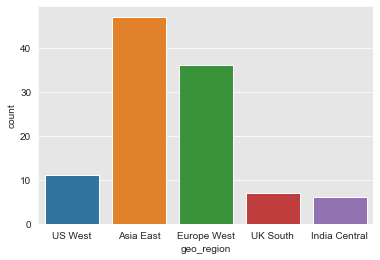

In [50]:
to_avoid.loc[:,'geo_region'] = to_avoid['geo_region'].astype(geo)
sns.countplot(data = to_avoid, x = 'geo_region');

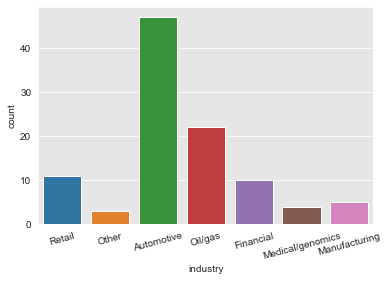

In [51]:
sns.countplot(data = to_explore, x = 'industry')
plt.xticks(rotation = 15);

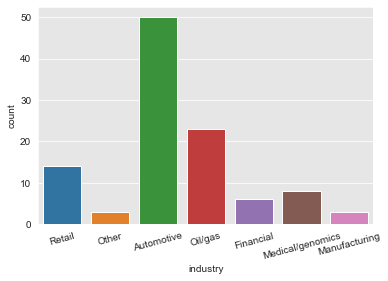

In [52]:
sns.countplot(data = to_avoid, x = 'industry')
plt.xticks(rotation = 15);

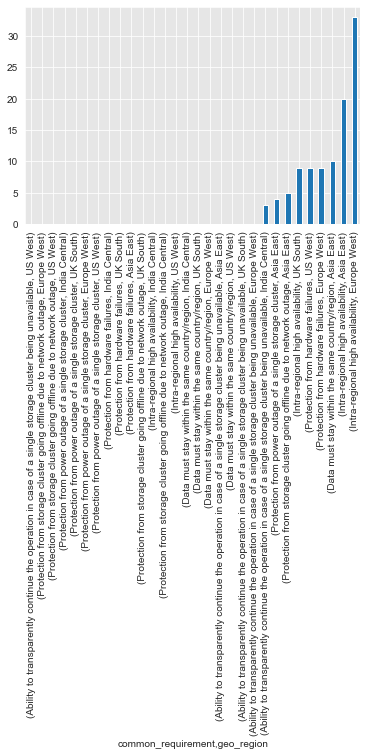

In [54]:
to_explore.groupby(['common_requirement','geo_region'])['geo_region'].count().sort_values().plot(kind = 'bar');

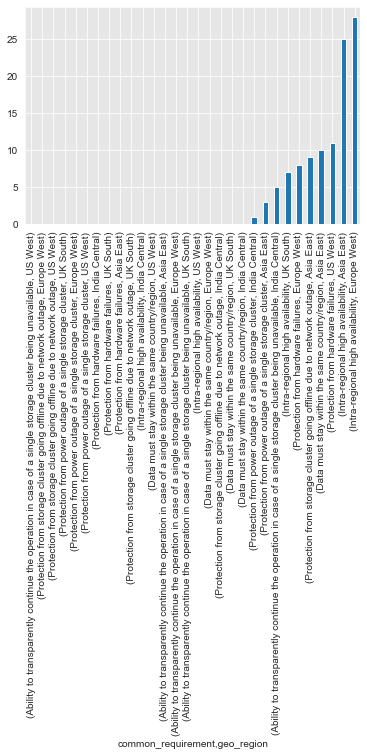

In [56]:
to_avoid.groupby(['common_requirement','geo_region'])['geo_region'].count().sort_values().plot(kind = 'bar');

In [71]:
data.columns

Index(['geo_region_customers', 'current_usage_TB', 'industry',
       'common_requirement', 'internal_external', 'geo_region_demand',
       'total_12mo_mkt_TB', 'feed_1', 'feed_2', 'feed_3'],
      dtype='object')

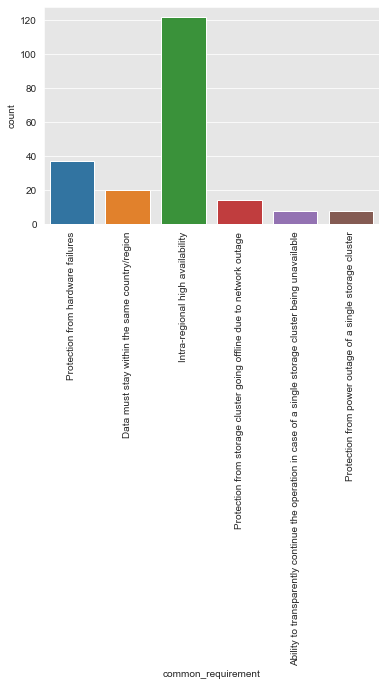

In [57]:
sns.countplot(data.common_requirement)
plt.xticks(rotation = 90);

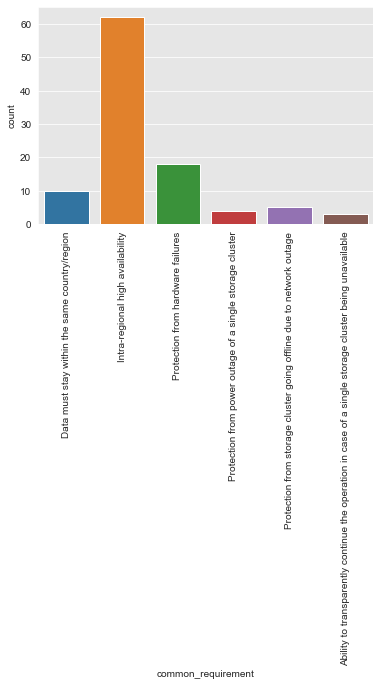

In [58]:
sns.countplot(to_explore.common_requirement)
plt.xticks(rotation = 90);

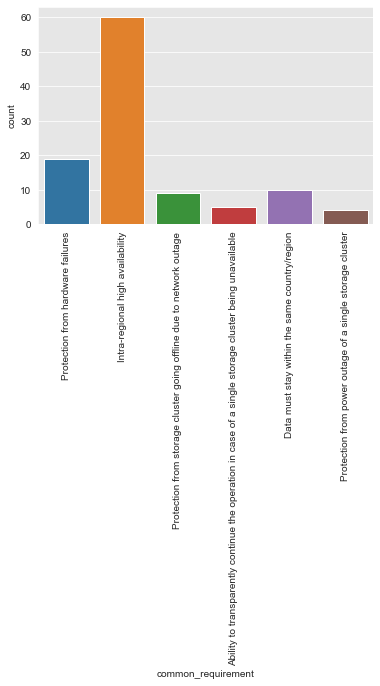

In [59]:
sns.countplot(to_avoid.common_requirement)
plt.xticks(rotation = 90);

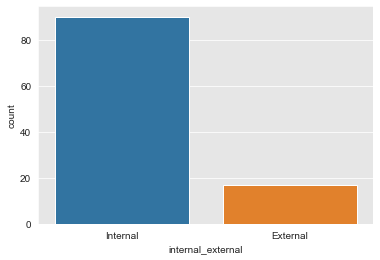

In [60]:
sns.countplot(data = to_avoid, x = 'internal_external');

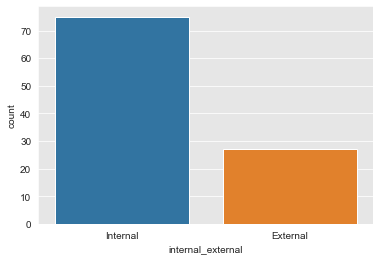

In [61]:
sns.countplot(data = to_explore, x = 'internal_external');

In [62]:
os.listdir()

['.ipynb_checkpoints',
 'Customers.csv',
 'Customers.xlsx',
 'Demand_forecast.csv',
 'growth_azure_synapse.ipynb',
 'Pain_points_and_feedback.csv',
 'peer_feedback_udacity.png',
 'Product_business_review.csv',
 'TM_WORLD_BORDERS-0.3',
 'TM_WORLD_BORDERS_SIMPL-0.3',
 'unleashing_storage_growth.docx',
 'World_Regions.lpk',
 '~$leashing_storage_growth.docx']

In [63]:
review = pd.read_csv('Product_business_review.csv')

In [64]:
review

,Preview date,7/23/2019
0,General availability date,9/21/2019
1,Price at preview,$0.015/GB
2,Price at GA,$0.03/GB
3,Regional availability,"US West, Europe West, UK South, Asia East, Ind..."
4,Physical capacity per region,~40000 TB
5,Sellable capacity per region,~25% of physical
6,Gross margin at listed price,~33%
7,Overall portfolio gross margin,~65%
8,Overall protfolio sellable capacity ratio,~80% of physical
9,Competition gross margin,~70%


In [65]:
data.columns

Index(['geo_region', 'current_usage_TB', 'industry', 'common_requirement',
       'internal_external', 'total_12mo_mkt_TB', 'feed_1', 'feed_2', 'feed_3'],
      dtype='object')

In [66]:
data.head()

,geo_region,current_usage_TB,industry,common_requirement,internal_external,total_12mo_mkt_TB,feed_1,feed_2,feed_3
customer_name,,,,,,,,,
Abb Inc.,US West,1.562404,Retail,Protection from hardware failures,Internal,165.802858,NaN,NaN,NaN
Accela Inc.,Asia East,0.081468,Other,Data must stay within the same country/region,Internal,120.525586,Vague documentation and/or lack thereof,High cost,High cost
Adapto Technologies,Europe West,1.718511,Automotive,Intra-regional high availability,Internal,222.547734,Vague documentation and/or lack thereof,High cost,Regional availability
Adrian,Asia East,0.945207,Automotive,Intra-regional high availability,Internal,134.665451,Vague documentation and/or lack thereof,High cost,Regional availability
Agder Energi As,Europe West,0.208729,Oil/gas,Intra-regional high availability,Internal,167.969748,NaN,NaN,NaN


In [67]:
data['current_revenue'] = data.loc[:, 'current_usage_TB']*15

In [69]:
data.current_revenue.sum()

2999.999999943

In [70]:
data['prospect_revenue'] = data.loc[:, 'total_12mo_mkt_TB']*15

In [71]:
data.prospect_revenue.sum()

600000.00000561